<span class="badge badge-info">ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ</span>
# Определение закономерности успешности компьютерной игры 

## Описание проекта

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, нужно **`выявить определяющие успешность игры закономерности`**.  Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**`Данные до 2016 года`**. Данные за 2016 год могут быть неполными. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

Примечание. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Инструкция по выполнению проекта

### Шаг 1. Получение данных

 - 1.1. Импорт библиотек и загрузка данных.
 - 1.2. Осмотр данных.
 - 1.3. Выводы.

### Шаг 2. Предобработка данных

 - 2.1. Замена названия столбцов.
 - 2.2. Обработка пропусков.
 - 2.3. Замена типа данных.
 - 2.4. Преобразование строки в нижний регистр.
 - 2.5. Выводы.

### Шаг 3. Подготовка данных

 - 3.1. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### Шаг 4. Исследовательский анализ данных

 - 4.1.	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - 4.2.	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - 4.3.	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. 
 - 4.4.	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - 4.5.	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - 4.6.	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - 4.7.	Соотнесите выводы с продажами игр на других платформах.
 - 4.8.	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 5. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
 - 5.1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - 5.2. Самые популярные жанры (топ-5). Поясните разницу.
 - 5.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 6. Проверка гипотез

 - 6.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - 6.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Шаг 7. Общий вывод исследования

----

## Шаг 1. Получение данных

### 1.1. Импорт библиотек и загрузка данных

In [1]:
# Необходимые библиотеки для исследования.
import pandas as pd                             # для анализа данных
import numpy as np                              # для математических вычислений

import seaborn as sns                           # для визуализации данных
import matplotlib.pyplot as plt                 # для визуализации
%matplotlib inline

from datetime import datetime                   # для преобразования к типу данных
from scipy import stats as st                   # для высокоуровневых математических вычислений 

import warnings                                 # для предупреждений в программе 
warnings.filterwarnings('ignore')               # фильтр предупреждений

Примечание: для того, чтобы загрузить файл с данными в Jupiter Notebook на локальной машине, достаточно поместить файл в папку, где лежит запущенный IPython Notebook и вызвать только по названию файла.

In [2]:
# Загрузка данных.
games_data = pd.read_csv('games.csv')           # информация о играх, данные до 2016 года

In [3]:
# С помощью pd.set_option настроим вывод так чтобы
pd.set_option('display.max_columns', None)             # текст в ячейке отражался полностью вне зависимости от длины;
pd.set_option('display.float_format', '{:.2f}'.format) # все числа отражались с двумя знаками после запятой.

In [4]:
# Установка эстетических параметров графиков.
sns.set(context='notebook', style='whitegrid', palette='Set3', font='sans-serif', font_scale=1, color_codes=False, rc=None) 

### 1.2. Осмотр данных

Рассмотрим таблицу **`games_data`**о играх.

In [5]:
games_data.head(10) # получение первых 10 строк таблицы games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


In [6]:
games_data.describe().T # выведем статистику о датасете методом describe()

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.00,2006.48,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
NA_sales,16715.00,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,16715.00,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,16715.00,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,16715.00,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,8137.00,68.97,13.94,13.00,60.00,71.00,79.00,98.00


In [7]:
games_data.describe(include='object').T # теперь включая только строковые столбцы 

,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


In [8]:
games_data.isnull().sum().sort_values() # суммарное количество пропусков, отсортируем методом sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [9]:
games_data.duplicated().sum() # количество дубликатов

0

In [10]:
games_data.info() # получение общей информации о данных в таблице games_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице 16715 строк (наблюдений) и 11 столбцов, встречаются следующие типы данных: float64 (вещественные числа) и object (строки). 

### 1.3. Выводы

Наблюдаются следующие проблемы с данными:
 - названия столбцов написаны не совсем удобно;
 - некорректные типы данных в 'Year_of_Release', 'Critic_Score', 'User_Score';
 - пропущенные значения в столбце 'Name', 'Genre', Year_of_Release', 'Critic_Score', 'User_Score', 'Rating';
 - 'tbd' значения в переменной 'User_Score'.

## Шаг 2. Предобработка данных

### 2.1. Замена названия столбцов

In [11]:
# Получаем перечень названий столбцов таблицы games_data.
games_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
# Переименуем столбец 'Name' для удобства дальнейшей работы.
games_data.rename(columns={'Name': 'game'}, inplace=True)

In [13]:
# Приведём столбцы к нижнему регистру.
games_data.columns = games_data.columns.str.lower()

In [14]:
games_data.columns # проверим результат

Index(['game', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Обработка пропусков

В данных наблюдается очень большое количество пропущенных значений в столбцах с годом релиза, с оценкой пользователей, с рейтингом ESRB и с оценкой критиков. Еще в оценках пользователей присутствуют значение 'tbd', что означает от английского To Be Determined (будет определено) или To Be Decided (будет решено). Заменим все эти значения на маркер -1, так как, восстановить данные не представляется возможным, а заменять оценки каким-либо другим значением может сместить их. Таким образом, в дальнейшем не будем использовать их в анализе.

Для начала, в столбце c названием игры и жанра, заменим пропущенные значения на строку 'неизвестно'.

In [15]:
# Замена пропущенных значений в столбцам 'game' и 'genre' на строку 'unknown' специальным методом замены.
games_data.fillna({'game':'unknown', 'genre':'unknown'}, inplace=True)

In [16]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.NaN, regex=True) # замена tbd на nan

In [17]:
games_data.fillna({'year_of_release': -1, 'critic_score': -1, 'user_score': -1, 'rating': -1}, inplace=True)

In [18]:
games_data.isnull().sum().sort_values() # суммарное количество пропусков, отсортируе методом sort_values()

game               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### 2.3. Замена типа данных

In [19]:
# Заменим тип данных.
games_data['year_of_release'] = games_data['year_of_release'].astype('int')
games_data['critic_score'] = games_data['critic_score'].astype('int')
games_data['user_score'] = games_data['user_score'].astype('float')

### 2.4. Преобразование строки в нижний регистр

In [20]:
# Приведем строки к нижнему регистру.
games_data['game'] = games_data['game'].str.lower()
games_data['genre'] = games_data['genre'].str.lower()
games_data['platform'] = games_data['platform'].str.lower()

In [21]:
games_data.head(10) # проверим результат предобработки

,game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.00,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.00,-1
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.30,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.00,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.00,-1
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1,-1.00,-1
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.50,E
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.60,E
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,8.40,E
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1,-1.00,-1


In [22]:
games_data.info() # проверим результат предобработки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


### 2.5. Выводы

На этапе осмотра данных обнаружилось большое количество пропусков, проблемы с названиями столбцов, а также некорректный тип данных и аномальные значения. Пустые значения свидетельствуют, что для некоторых игр доступна не вся информация. Причины могут быть разные: например, не названа конкретная игра и её жанр, или были проблемы с записью данных, как например, с оценками пользователей и критиков, и в рейтинге. 

Для некоторых пропущенных значений я старалась восстановить данные и предположила логичную замену:

 - заменила названия столбцов и привела к нижнему регистру, а также их значения;
 - в столбце c названием игры и жанр, заменила пропущенные значения на строку 'неизвестно';
 - надо учитывать, что, в столбце с оценкой пользователей и критиков пропусков очень много и их заполнение каким-либо значением может сместить оценки. Поэтому, пропущенные значения заменила на маркер -1, чтобы в дальнейшем не использовать их в анализе;
 - также, в рейтинге, пропущенные значения заменила на -1;
 - преобразовала данные в нужные типы:
    - в столбце 'year_of_release', перевела значения с плавающей точкой в целое число, потому что, пропуски заменили на -1, а это не входит в формат timedate;
    - в столбце 'critic_score', перевела значения с плавающей точкой в целое число;
    - в столбце 'user_score', заменила строки на вещественные числа.

Поработали с пропусками. Преобразовали данные в нужные типы. Теперь данные годятся для анализа.

## Шаг 3. Подготовка данных

### 3.1. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [23]:
# Cуммарные продажи во всех регионах.
games_data['global_sales'] = games_data['na_sales'] + games_data['eu_sales'] \
                                                    + games_data['jp_sales'] + games_data['other_sales']
games_data.columns.tolist()

['game',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating',
 'global_sales']

In [24]:
# Поменяем логику столбцов на более удобную.
games_data = games_data[['game',
                         'genre',
                         'platform',
                         'year_of_release',
                         'na_sales',
                         'eu_sales',
                         'jp_sales',
                         'other_sales',
                         'global_sales',
                         'critic_score',
                         'user_score',
                         'rating',
                        ]]
games_data.head()

,game,genre,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
0,wii sports,sports,wii,2006,41.36,28.96,3.77,8.45,82.54,76,8.00,E
1,super mario bros.,platform,nes,1985,29.08,3.58,6.81,0.77,40.24,-1,-1.00,-1
2,mario kart wii,racing,wii,2008,15.68,12.76,3.79,3.29,35.52,82,8.30,E
3,wii sports resort,sports,wii,2009,15.61,10.93,3.28,2.95,32.77,80,8.00,E
4,pokemon red/pokemon blue,role-playing,gb,1996,11.27,8.89,10.22,1.00,31.38,-1,-1.00,-1


In [25]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game             16715 non-null  object 
 1   genre            16715 non-null  object 
 2   platform         16715 non-null  object 
 3   year_of_release  16715 non-null  int32  
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   global_sales     16715 non-null  float64
 9   critic_score     16715 non-null  int32  
 10  user_score       16715 non-null  float64
 11  rating           16715 non-null  object 
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец. А также, поменяли логику столбцов на более удобную. 

## Шаг 4. Исследовательский анализ данных

### 4.1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

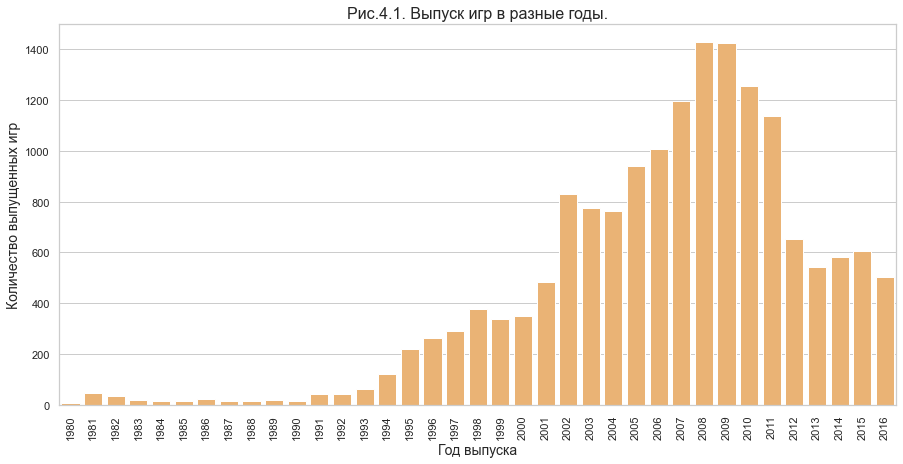

,game
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136


In [26]:
# Посчитаем сколько игр выпускалось в разные годы. Используя сводные таблицы.
year_of_release_game = games_data.pivot_table(index='year_of_release',
                                               values='game',
                                               aggfunc='count').query('year_of_release != -1')

# построим график SEABORN
plt.figure(figsize=(15,7))
sns.barplot(x=year_of_release_game.index, y=year_of_release_game['game'], color='#fdb462') 
plt.xticks(rotation= 90)
plt.title('Рис.4.1. Выпуск игр в разные годы.', fontsize=16)
plt.xlabel('Год выпуска', size=14)
plt.ylabel('Количество выпущенных игр', size=14)
plt.show()

year_of_release_game.sort_values(by='game', ascending=False).head()

### Вывод

Исходя из полученного графика, основное количество игр выходило с 1990 по 2016 годы. С 1994 года виден рост выпусков новых игр. В 2002 году произошел скачок по количеству игр, выпущенных в год. Пик приходиться на 2008-2009 год. Заметно снижение объема с начала 2011 года, возможно это связанно с развитием технологий и гаджетов.

### 4.2. Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

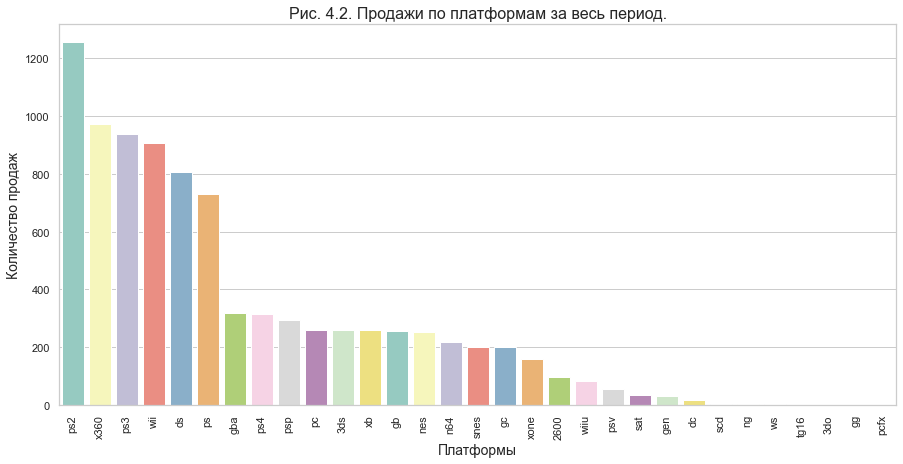

,platform,global_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,pc,259.52


In [27]:
# Найдем объем продаж для каждой платформы.
platform_global_sales = games_data.pivot_table(index='platform', 
                                               values='global_sales', 
                                               aggfunc=sum).sort_values(by='global_sales', ascending=False)
# построим график
plt.figure(figsize=(15,7))
sns.barplot(x=platform_global_sales.index, y=platform_global_sales['global_sales'], palette='Set3')
plt.title('Рис. 4.2. Продажи по платформам за весь период.', fontsize=16)
plt.xticks(rotation= 90)
plt.xlabel('Платформы', size=14)
plt.ylabel('Количество продаж', size=14)
plt.show()

# найдем топ-10 платформ с наибольшими суммарными продажами
top_10_platform_global_sales = platform_global_sales.sort_values(by='global_sales', ascending=False).head(10)\
                                                    .reset_index()
top_10_platform_global_sales

### Вывод

Топ-5 проданных платформ: **`PS2, X360, PS3, Wii, DS.`**

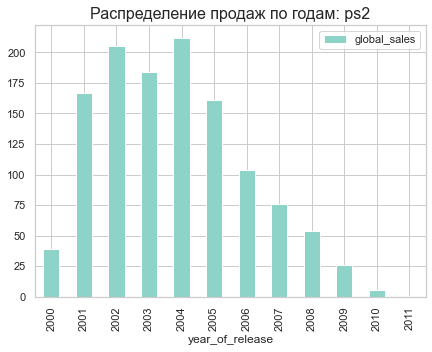

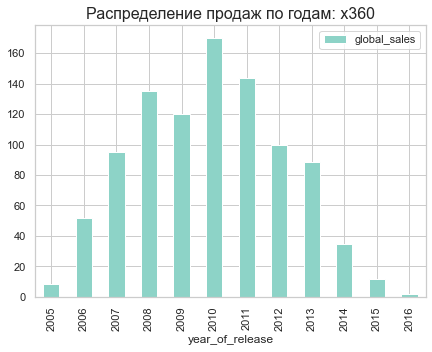

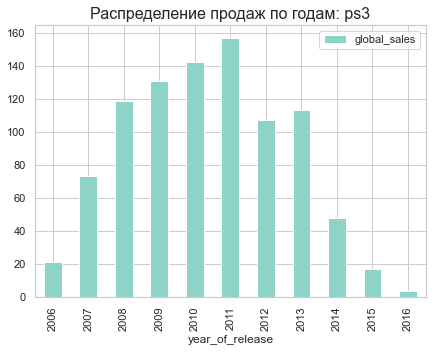

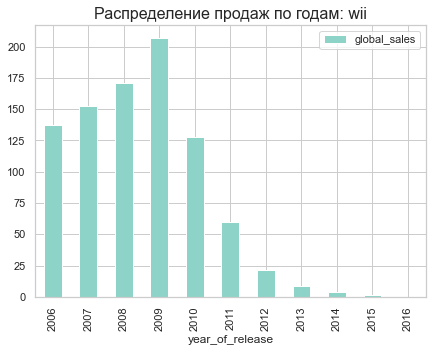

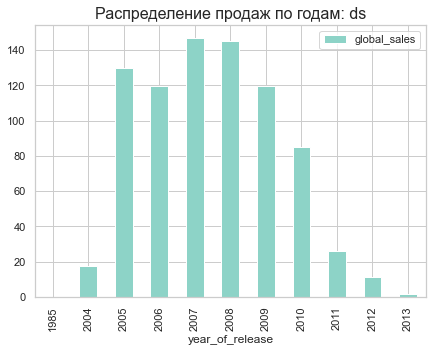

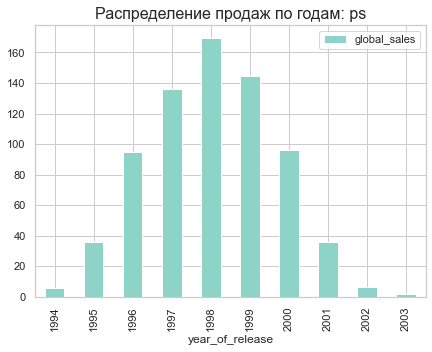

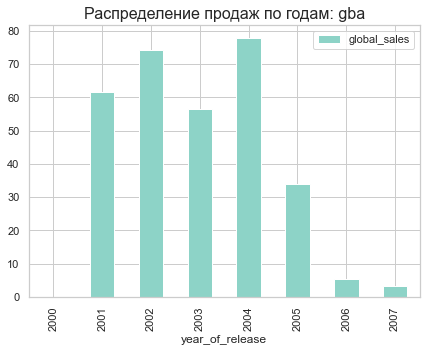

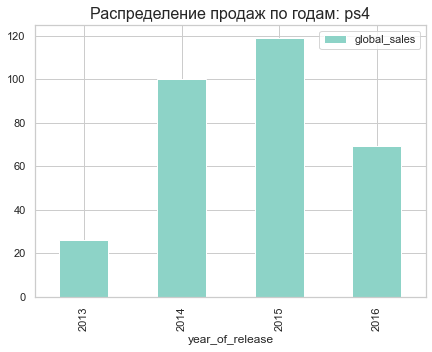

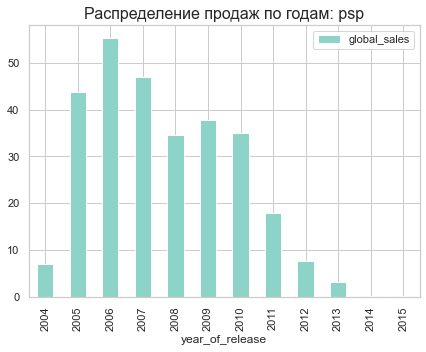

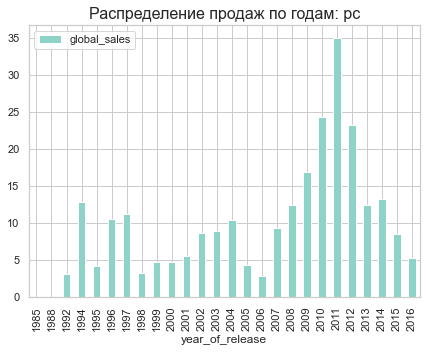

In [28]:
# Посторим распределение продаж по годам для наиболее прибыльных платформ.
for platform in top_10_platform_global_sales['platform'].unique():
    games_data[games_data['platform'] == platform].pivot_table(index='year_of_release',
                                                               values='global_sales',
                                                               aggfunc='sum').query('year_of_release != -1')\
                                                  .plot(kind='bar', figsize=(7,5))
    plt.title('Распределение продаж по годам: ' + platform, fontsize=16)

### Вывод

Судя по графикам, видим, что **`срок жизни платформы`** составляет около **`10 лет`**.

 - PlayStation 2 - ps2 - 2000 – 2010 гг.
 - Xbox 360 - x360 - 2005-2016 гг.
 - PlayStation 3 - ps3 - 2006-2016 гг. 
 - Nintendo Wii - wii - 2006-2015 гг.
 - Nintendo DS - ds - 2004-2013 гг.
 - Game Boy Advance - gda - 2001-2007 гг.
 - PlayStation 4 - ps4 - 2013-2016 гг. 
 - PlayStation Portable - psp - 2004-2013 гг.
 - Персональный компьютер - pc - 1992 г.-актуален на сегодня.

### 4.3. Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитываем в работе данные за предыдущие годы.

За **`актуальный период можно взять 2013-2016 гг.`** Это период активной фазы платформы PlayStation4, все остальные платформы находятся в своей конечной фазе коммерческого существования, вклад которых в прогноз 2017 года не значителен.

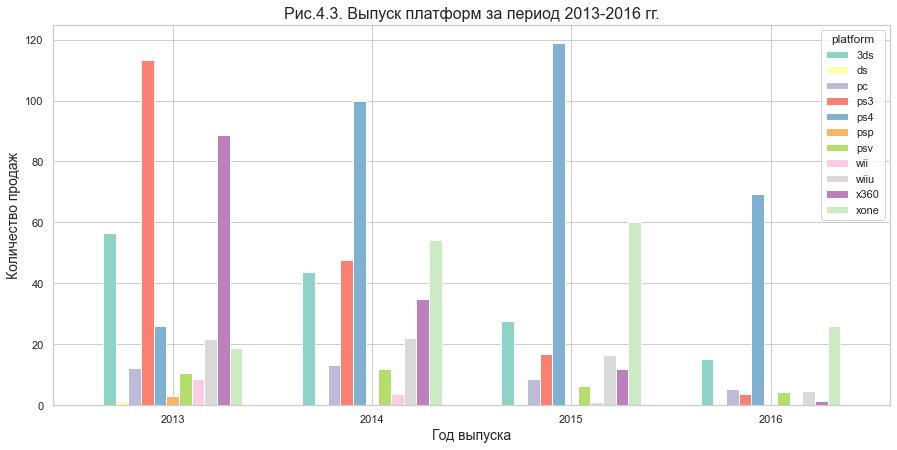

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,nan,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,nan,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,nan,5.25,3.60,69.25,nan,4.25,0.18,4.60,1.52,26.15


In [29]:
# Возьмём данные за соответствующий актуальный период 2013-2016 гг., все данные после 2012 года.
actual_data = games_data.query('year_of_release > 2012')

# Посторим распределение продаж за период 2013-2016 гг.
top_release_platform = actual_data.pivot_table(index='year_of_release', 
                                      columns = 'platform',
                                      values='global_sales',
                                      aggfunc='sum').query('year_of_release != -1')
# построим график
top_release_platform.plot(kind='bar', figsize=(15, 7), width=0.7)
plt.title('Рис.4.3. Выпуск платформ за период 2013-2016 гг.', fontsize=16)
plt.xticks(rotation=0) 
plt.xlabel('Год выпуска', size=14)
plt.ylabel('Количество продаж', size=14)
plt.show()

top_release_platform

### Вывод

Судя по полученным результатам, наблюдается следующее: 
 - в своей активной коммерческой фазе пребывает платформа PS4 и XOne; 
 - тогда как лидеры по продажам 2013 года: PS3 и X360, к 2015-2016 гг. уже исчерпали свой коммерческий ресурс.

### 4.4. Какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.

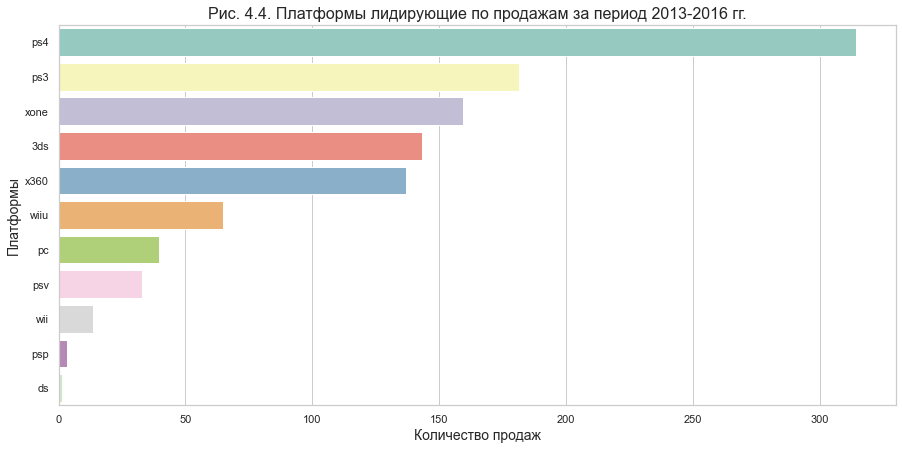

,global_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80


In [30]:
# Посторим какие платформы лидируют по продажам за период 2013-2016 гг.
platforms_leading_sales = actual_data.pivot_table(index='platform', 
                                                  values='global_sales',
                                                  aggfunc='sum').sort_values(by='global_sales', ascending=False)
# построим график
plt.figure(figsize=(15,7))
sns.barplot(y=platforms_leading_sales.index, x=platforms_leading_sales['global_sales'], palette='Set3')
plt.title('Рис. 4.4. Платформы лидирующие по продажам за период 2013-2016 гг.', fontsize=16)
plt.ylabel('Платформы', size=14)
plt.xlabel('Количество продаж', size=14)
plt.show()

platforms_leading_sales.head()

### Вывод

**К лидерам по продажам за актуальный период 2013-2016 гг. относятся PS4, PS3, XOne, 3DS и X360.**

- Потенциально прибыльные и растущие платформы за период 2013-2016 гг.: `PS4, PS3, XONE, 3DS, X360.` 

- Потенциально падающие платформы за период 2013-2016 гг.: `WIIU, PC, PSV, WII, PSP, DS.`

### 4.5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

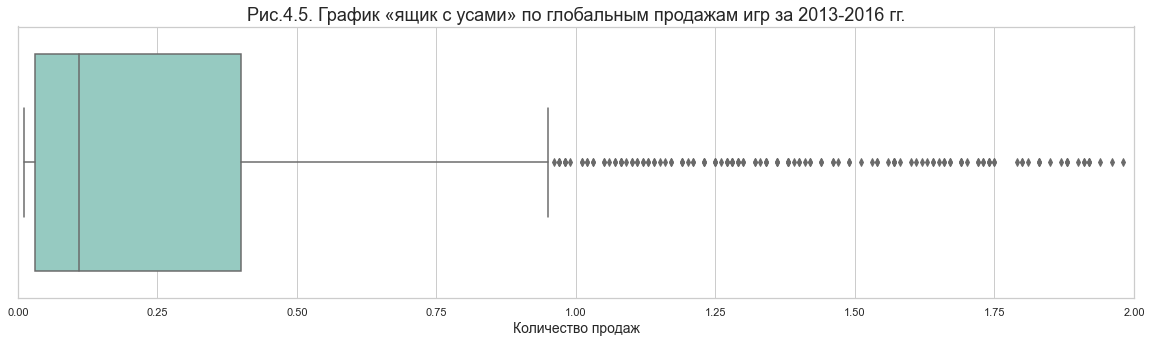

count   2233.00
mean       0.49
std        1.24
min        0.01
25%        0.03
50%        0.11
75%        0.40
max       21.05
Name: global_sales, dtype: float64

In [31]:
# Построим график «ящик с усами» по глобальным продажам всех игр.
plt.figure(figsize=(20,5))
sns.boxplot(data=actual_data, x='global_sales')
plt.title('Рис.4.5. График «ящик с усами» по глобальным продажам игр за 2013-2016 гг.', fontsize=18)
plt.xlim(0,2)
plt.xlabel('Количество продаж', size=14)
plt.show()

actual_data['global_sales'].describe()

### Вывод

В среднем количество проданных игр составляет 490 000 копий. Медиана - 110 000 проданных копий. Возможно в наборе данных есть выбросы, так как стандартное отклонение больше среднего значения, оно составляет 1,2 млн проданных копий.

<Figure size 1440x720 with 0 Axes>

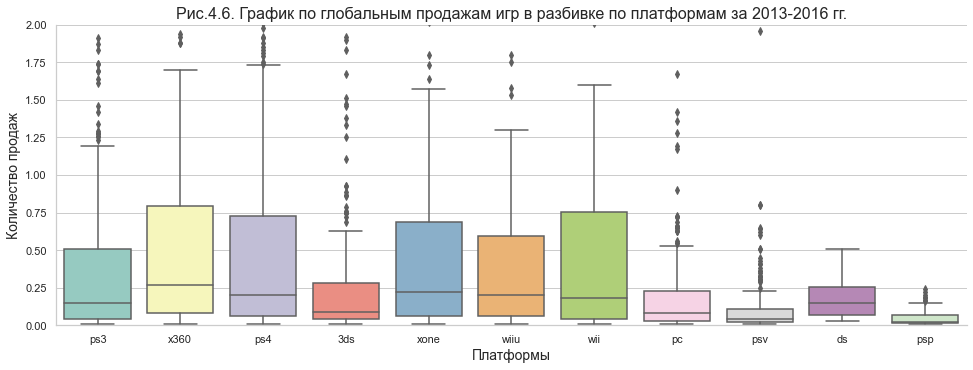

In [32]:
# Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам за 2013-2016 гг.
plt.figure(figsize=(20,10))
sns.catplot(kind='box', data=actual_data, x='platform', y='global_sales', orient='v', height=5, aspect=2.7, palette='Set3')
plt.xlabel('Платформы', size=14)
plt.ylabel('Количество продаж', size=14)
plt.ylim(0,2)
plt.title('Рис.4.6. График по глобальным продажам игр в разбивке по платформам за 2013-2016 гг.', fontsize=16)
plt.show()

### Вывод

Медиана по топовым платформам варьируется от 0,2 до 0,3 млн копий игр.
Верхняя граница предела, за которыми уже определяются выбросы, у обоих платформ, PS4 и X360, на уровне 1,7 млн копий игр.
У остальных от 1 до 1,5 миллионов копий игр.

Самые низкие показатели у платформы PSP. Медиана меньше 0,1 млн. копий, верхняя граница 0,2 млн.

### 4.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

Рассмотрим влияние отзывов пользователей и критиков на продажи игр на примере **`платформы Xbox360`** - лидера по продажам в период `за 2013-2016 гг.`

Коэффициент корреляции для отзывов: -0.01 


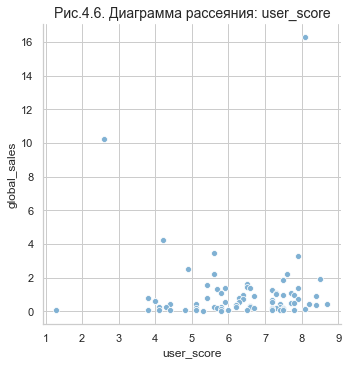

Коэффициент корреляции для отзывов: 0.35 


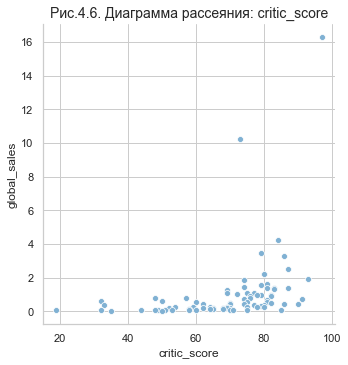

In [33]:
# Рассмотрим влияние отзывов пользователей и критиков на продажи игр на примере платформы x360,
# лидера по продажам в период 2013-2016 гг. Уберем из dataframe значения -1, так как мы не используем их в анализе.
x360 = actual_data.query('platform == "x360"').query('user_score != -1 and critic_score != -1')

# Посчитаем коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж.
# и построим корреляционную диаграмму.
for column in ['user_score', 'critic_score']:
    print('Коэффициент корреляции для отзывов: {} '.format(round(x360[column].corr(x360['global_sales']), 2)))
    sns.relplot(x=column, y='global_sales', data=x360, color='#80b1d3')
    plt.title('Рис.4.6. Диаграмма рассеяния: '+ column, fontsize=14)
    plt.show()

### Вывод

По результатам видно, что:
 - оценка пользователей не влияет на продажи платформы x360, корреляция в -0,01 говорит о очень слабой взаимозависимости;
 - оценка критиков влияет на продажи платформы x360, коэффициент корреляции Пирсона положительный, 0,35, есть взаимозависимость. Чем выше оценка критиков, тем больше продаж.

### 4.7. Соотнесем выводы с продажами игр на других платформах.

Платформа ps4:
Коэффициент корреляции для user_score и global_sales: -0.03
Коэффициент корреляции для critic_score и global_sales: 0.41
Платформа xone:
Коэффициент корреляции для user_score и global_sales: -0.09
Коэффициент корреляции для critic_score и global_sales: 0.41
Платформа 3ds:
Коэффициент корреляции для user_score и global_sales: 0.27
Коэффициент корреляции для critic_score и global_sales: 0.34


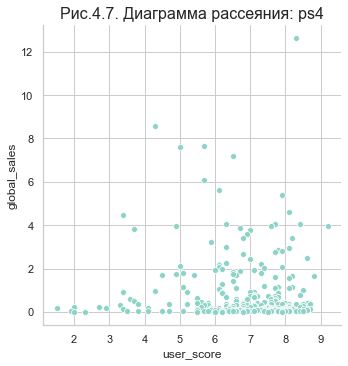

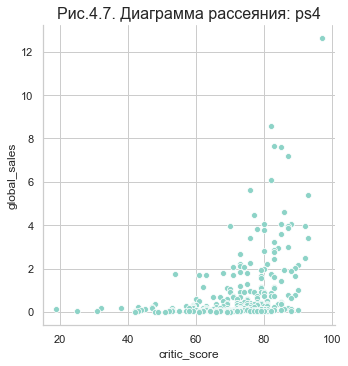

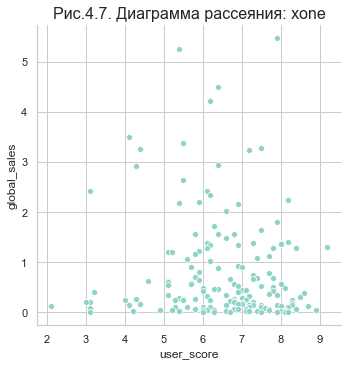

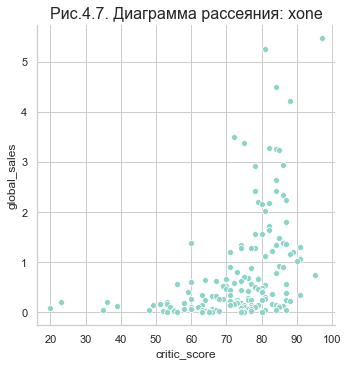

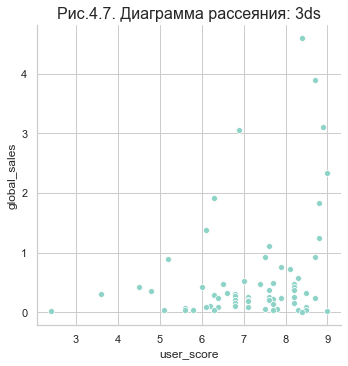

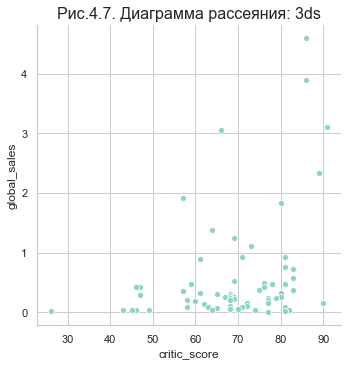

In [34]:
# Рассмотрим влияние отзывов пользователей и критиков на продажи игр на другие платформы по продажам в период 2013-2016 гг.
for platform in ['ps4', 'xone', '3ds']:
    print('Платформа {0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        filtered_data = actual_data.query('platform == @platform and (user_score != -1) and (critic_score != -1)')
        print('Коэффициент корреляции для {0} и global_sales: {1}'.\
              format(column, round(filtered_data[column].corr(filtered_data['global_sales']), 2)))
        sns.relplot(x=column, y='global_sales', data=filtered_data)
        plt.title('Рис.4.7. Диаграмма рассеяния: '+ platform, fontsize=16)

### Вывод

По результатам видно, что:
 - оценка пользователей не влияет на продажи платформ;
 - оценка критиков влияет на продажи платформ, коэффициенты корреляции Пирсона положительные, есть взаимозависимость. Чем выше оценка критиков, тем больше продаж.

### 4.8.	Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

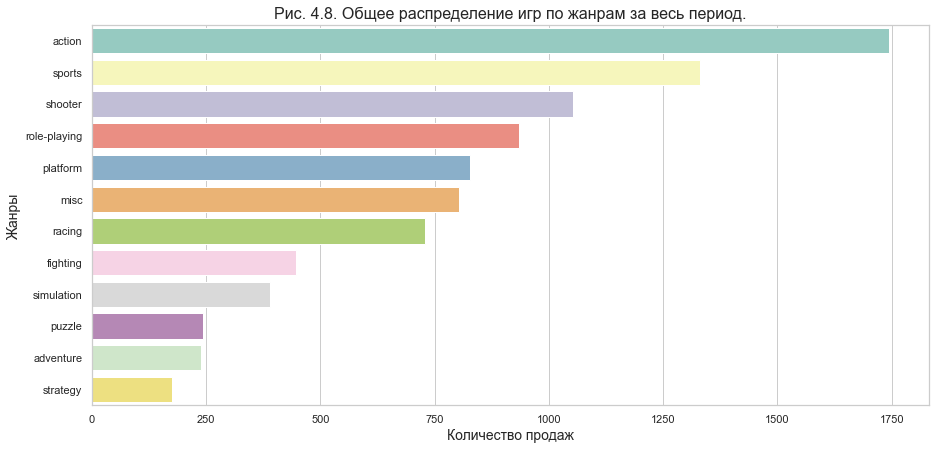

,global_sales
genre,
action,1744.17
sports,1331.27
shooter,1052.45
role-playing,934.56
platform,827.77
misc,802.51
racing,728.67
fighting,447.53
simulation,389.97


In [35]:
# Распределение игр по жанрам за весь период.
genre_sales = games_data.pivot_table(index='genre', 
                                     values='global_sales', 
                                     aggfunc='sum').sort_values('global_sales', ascending=False).query('genre != "unknown"') 
# построим график
plt.figure(figsize=(15,7))
sns.barplot(y=genre_sales.index, x=genre_sales['global_sales'], palette='Set3')
plt.title('Рис. 4.8. Общее распределение игр по жанрам за весь период.', fontsize=16)
plt.ylabel('Жанры', size=14)
plt.xlabel('Количество продаж', size=14)
plt.show()

genre_sales

### Вывод

По полученным результатам видно, что лидер продаж игр, жанр которых `'экшн'`. За ним следует жанр `'спортивные'`, потом идут игры с жанром `'шутеры'`. Игры с этими жанрами больше всех вызывают самые яркие эмоции у пользователей.

Жанры с самыми низкими продажами это `'пазлы'` и `'стратегии'`. Игры с жанром стратегии, требуют от игрока тщательно проработанной стратегии и тактики для преодоления трудностей. А, игры с жанром пазлы, предполагают какие-либо логические загадки. Игры таких жанров менее привлекательны из-за своей сложности.

## Шаг 5. Составление портрета пользователя каждого региона

### 5.1. Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP) за весь период. Опишите различия в долях продаж.

In [36]:
# Напишем функцию для автоматического построения графиков с заявленными параметрами.
def user_of_each_region_plot(groupby, region_sales, ax):

    grouped = games_data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    
    title_dict = {'na_sales': 'Северная Америка за весь период.', 
                  'eu_sales': 'Европа за весь период.', 
                  'jp_sales': 'Японии за весь период.'}
    
    color_dict = {'na_sales': '#8dd3c7', 
                  'eu_sales': '#fdb462', 
                  'jp_sales': '#fb8072'}

    plot = grouped.plot(kind='bar', title=title_dict[region_sales], ax=axes[ax], fontsize=20, 
                        color=color_dict[region_sales], rot=25)
    plot.legend(prop={'size':16})
    plot.set_xlabel('')
    plot.title.set_size(20)

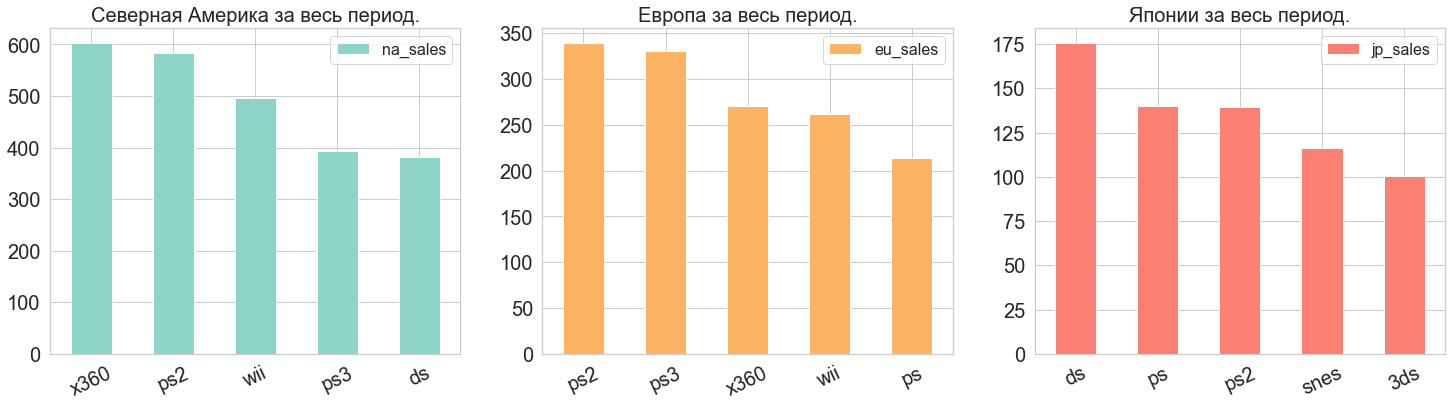

In [37]:
# Самые популярные платформы (топ-5).
fig, axes = plt.subplots(1, 3, figsize=(25,6))
user_of_each_region_plot('platform', 'na_sales', 0)
user_of_each_region_plot('platform', 'eu_sales', 1)
user_of_each_region_plot('platform', 'jp_sales', 2)

In [38]:
# Сделаем цикл для различия в долях продаж.
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = games_data.pivot_table(index='platform', values=column, aggfunc='sum').sort_values(column, ascending=False)
    region['ratio'] = (region[column] / region[column].sum()*100).round(1).astype('str') +'%'
    display(region.nlargest(5, column))

,na_sales,ratio
platform,,
x360,602.47,13.7%
ps2,583.84,13.3%
wii,496.90,11.3%
ps3,393.49,8.9%
ds,382.40,8.7%


,eu_sales,ratio
platform,,
ps2,339.29,14.0%
ps3,330.29,13.6%
x360,270.76,11.2%
wii,262.21,10.8%
ps,213.61,8.8%


,jp_sales,ratio
platform,,
ds,175.57,13.5%
ps,139.82,10.8%
ps2,139.20,10.7%
snes,116.55,9.0%
3ds,100.67,7.8%


### Вывод

Судя по графикам, за весь период, в `Северной Америке и Европе` набор `топ-5 платформ почти одинаковый`, игроки больше предпочитают использовать **`игровые приставки`**, такие как Xbox360, PlayStation3, Nintendo Wii.  Nintendo DS выбирают в Северной Америке, а PlayStation в Европе. 

В `Японии` предпочитают **`портативные консоли`** больше, чем приставки, такие как Nintendo DS. Из игровых приставок очень любят PlayStation2 и PlayStation3.

Судя по долям продаж, в `Северной Америке` самой популярной платформой является **`Xbox360`**, а в `Европе`, **`PlayStation2.`**
В `Японии` на первом месте платформа **`DS`**, которая на Западе, напротив, занимает только 5 место по популярности. 

### 5.2. Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP) за весь период. Поясните разницу.

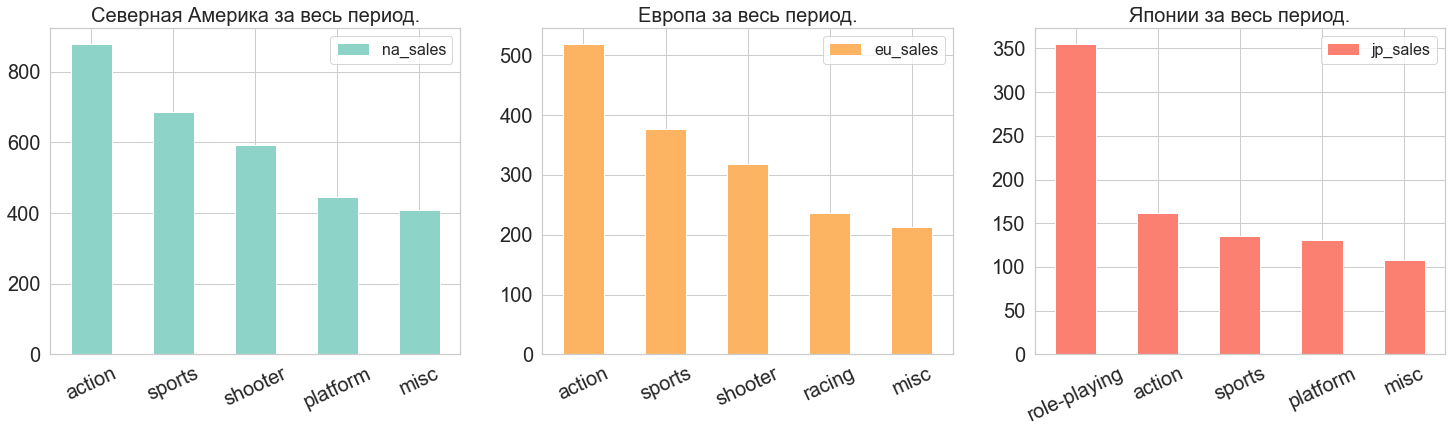

In [39]:
# Самые популярные жанры (топ-5). 
fig, axes = plt.subplots(1, 3, figsize=(25,6))
user_of_each_region_plot('genre', 'na_sales', 0)
user_of_each_region_plot('genre', 'eu_sales', 1)
user_of_each_region_plot('genre', 'jp_sales', 2)

### Вывод

Самые популярные жанры игр: 
 - В `западную` (Северная Америка и Европа) подборку топовых жанров попали `'экшн', 'спортивные'` и `'шутеры'` игры. 
 - В `восточную` (Япония) подборку топовых жанров попали `'ролевые игры'`, далее `'экшн'` и `'спортивные'` игры. Большинство ролевых видеоигр разработаны в Японии. Поэтому они такие популярные в данном регионе. 

### 5.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Не стану исключать игры без рейтинга, маркеры равные -1, так как в результате огромная часть игр просто выпадает из анализа.

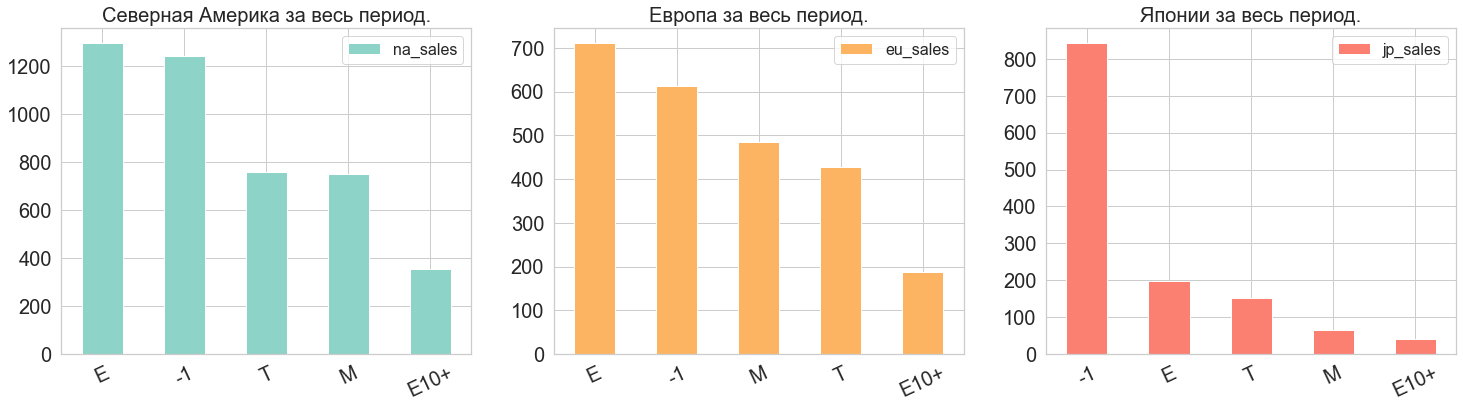

In [40]:
# Посмотрим на продажи игр по рейтингу. rating
fig, axes = plt.subplots(1, 3, figsize=(25,6))
user_of_each_region_plot('rating', 'na_sales', 0)
user_of_each_region_plot('rating', 'eu_sales', 1)
user_of_each_region_plot('rating', 'jp_sales', 2)

**`Рейтинг игры:`**

 - «EC» («Early childhood») — «Для детей младшего возраста»
 - «E» («Everyone») — «Для всех»
 - «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
 - «T» («Teen») — «Подросткам 13—19 лет»
 - «M» («Mature») — «От 17 лет»
 - «AO» («Adults Only 18+») — «Только для взрослых»
 - «RP» («Rating Pending»») — «Рейтинг ожидается»
 - «K-A» («Kids to Adults»)— «Для детей и взрослых»
 
Источник: [Рейтинги ESRB](https://www.esrb.org/)

### Вывод

Судя по графикам, для всех регионов топ-5 рейтингов одинаковый.

В 4ку входят:
 - «E» («Everyone») — «Для всех»
 - «T» («Teen») — «Подросткам 13—19 лет»
 - «M» («Mature») — «От 17 лет»
 - «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»

Рейтинг слабо влияет на продажи платформ в регионах, он везде почти одинаковой. 

## Шаг 6. Проверка гипотез

### 6.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза №1.

 - Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются.

`α=0,05` критический уровень статистической значимости для формулирования двусторонних гипотез

In [41]:
# Генерируем две независимые выборки.
xone = games_data.query('platform == "xone" and user_score != -1')['user_score']
pc = games_data.query('platform == "pc" and user_score != -1')['user_score']

Найдем соотношение дисперсий, и в случае различия более чем на 5 %, принять, что дисперсии не равны.

In [42]:
# Оценим дисперсию по выборке xone и pc.
print("Дисперсия пользовательского рейтинга на платформе Xbox One: {:.3f} ".format(np.var(xone, ddof=1)))
print("Дисперсия пользовательского рейтинга на платформе PC: {:.3f} ".format(np.var(pc, ddof=1)))
print("Соотношение дисперсий: {:.3f} ".format((np.var(pc, ddof=1))/(np.var(xone, ddof=1))))

Дисперсия пользовательского рейтинга на платформе Xbox One: 1.907 
Дисперсия пользовательского рейтинга на платформе PC: 2.341 
Соотношение дисперсий: 1.227 


In [43]:
# Выполним проверку гипотезы. Будем использовать метод ttest_ind.
alpha = 0.05 # критический уровень статистической значимости 

results = st.ttest_ind(xone, pc, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


In [44]:
print("Cреднее значение пользовательского рейтинга на платформе Xbox One: {:.3f} ".format(np.mean(xone)))
print("Cреднее значение пользовательского рейтинга на платформе PC: {:.3f} ".format(np.mean(pc)))

Cреднее значение пользовательского рейтинга на платформе Xbox One: 6.521 
Cреднее значение пользовательского рейтинга на платформе PC: 7.062 


### Вывод

P-value значительно меньше 0,05, это говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются. Отвергаем нулевую гипотезу. 

### 6.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза №2.

 - Нулевая гипотеза H₀: cредние пользовательские рейтинги жанров Action и Sports одинаковые.
 - Альтернативная гипотеза H₁: cредние пользовательские рейтинги жанров Action и Sports разные.

In [45]:
# Посчитаем данные по жанрам.
action = games_data.query('genre == "action" and user_score != -1')['user_score']
sports = games_data.query('genre == "sports" and user_score != -1')['user_score']

In [46]:
# Оценим дисперсию по выборке.
print("Дисперсия пользовательского рейтинга по жанру Action: {:.3f} ".format(np.var(action, ddof=1)))
print("Дисперсия пользовательского рейтинга по жанру Sports: {:.3f} ".format(np.var(sports, ddof=1)))
print("Соотношение дисперсий: {:.3f} ".format((np.var(sports, ddof=1))/(np.var(action, ddof=1))))

Дисперсия пользовательского рейтинга по жанру Action: 2.032 
Дисперсия пользовательского рейтинга по жанру Sports: 2.597 
Соотношение дисперсий: 1.278 


In [47]:
# Выполним проверку гипотезы. Будем использовать метод ttest_ind.
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(action, sports, equal_var = True) # equal_var = False

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


In [48]:
print("Cреднее значение пользовательского рейтинга по жанру Action: {:.3f} ".format(np.mean(action)))
print("Cреднее значение пользовательского рейтинга по жанру Sports: {:.3f} ".format(np.mean(sports)))

Cреднее значение пользовательского рейтинга по жанру Action: 7.054 
Cреднее значение пользовательского рейтинга по жанру Sports: 6.961 


### Вывод

Исходя из теста мы видим, что cредние пользовательские рейтинги жанров Action и Sports  одинаковые. Не получилось отвергнуть нулевую гипотезу.

## Шаг 7. Общий вывод исследования

Подводя итоги, **по результатам исследовательского анализа данных:**

Исходя из полученных данных, по графику выпуска игр в разные годы, основное количество игр выходило с 1990 по 2016 годы. С 1994 года виден рост выпуска новых игр. В 2002 году произошел скачок по количеству игр, выпущенных в год. Пик приходится на 2008-2009 года. Заметно снижение объема с начала 2011 года, возможно это связанно с развитием технологий и гаджетов.

Получили топ-5 проданных платформ, PlayStation2, Xbox 360, PlayStation3, Nintendo Wii, Nintendo DS.

По результатам срок жизни платформы составляет около 10 лет. За актуальный период взяли 2013-2016 гг. Период с 2013 по 2016 гг. это период платформы PlayStation4, все остальные платформы находятся в своей конечной фазе коммерческого существования, вклад которых в прогноз 2017 года не значителен.

По графику «столбчатой диаграмме» по глобальным продажам всех игр, определили потенциально прибыльные и растущие платформы за период 2013-2016 гг., это: PS4, XONE; а потенциально падающие платформы за период 2013-2016 гг.: WIIU, PC, PSV, WII, PSP, DS. 

К лидерам по продажам за актуальный период 2013-2016 гг. относятся PS4, PS3, XOne, 3DS и X360. 

Также узнали, что в среднем количество проданных игр составляет 490 000 копий. Медиана - 110 000 проданных копий. 

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам, и получили следующие результаты:
Медиана по топовым платформам варьируется от 0,2 до 0,3 млн копий игр.
Верхняя граница предела, за которыми уже определяются выбросы, у обоих платформ, PS4 и X360, на уровне 1,7 млн копий игр.
У остальных от 1 до 1,5 миллионов копий игр.

Рассмотрели влияние отзывов пользователей и критиков на продажи игр на примере платформы Xbox 360 за период 2013-2016 гг. Узнали что, оценка пользователей не влияет на продажи платформы Xbox 360, а оценка критиков влияет на продажи платформы Xbox 360, коэффициент корреляции Пирсона положительный 0,35, есть взаимозависимость. Чем выше оценка критиков, тем больше продаж.

Рассмотрели влияние отзывов пользователей и критиков на продажи игр на другие платформы за период 2013-2016 гг. Результаты похожие, оценка пользователей не влияет на продажи платформ; оценка критиков влияет на продажи платформ, это значительно выражено для платформы PS4, XONE похожие результаты как у Xbox 360.

Распределили игры по жанрам. По полученным результатам лидер продаж - игры, жанр которых 'экшн'. За ним следует жанр 'спортивные', потом идут игры с жанром 'шутеры'. Игры с этими жанрами больше всех вызывают самые яркие эмоции у пользователей. Жанры с самыми низкими продажами это 'пазлы' и 'стратегии'. Игры с жанром стратегии, требуют от игрока тщательно проработанной стратегии и тактики для преодоления трудностей. А игры с жанром пазлы, предполагают какие-либо логические загадки. Игры таких жанров менее привлекательны из-за своей сложности.

**По результатам составленного портрета пользователя каждого региона:**

Получили результаты по западным регионам, туда входит Северная Америка и Европа, и по восточным регионам, в которые входит Япония.

Пользователи `западных регионов` больше предпочитают использовать `игровые приставки`, такие как `Xbox360, PlayStation2, Nintendo Wii`. Nintendo DS выбирают в Северной Америке, а PlayStation в Европе. По долям продаж, за весь период, в Северной Америке самой популярной платформой является Xbox360, а в Европе, PlayStation2. В западную подборку топовых жанров попали `'экшн', 'спортивные' и 'шутеры' игры.`

Пользователи `восточных регионах` предпочитают `портативные консоли`, такие как `Nintendo DS и 3DS.` Из игровых приставок очень любят PlayStation2 и PlayStation3. В Японии на первом месте платформа DS, которая на западе, напротив, занимает только 5 место по популярности. В восточную подборку топовых жанров попали `'ролевые игры'`, далее `'экшн' и 'спортивные' игры.` Большинство ролевых видеоигр разработаны в Японии, поэтому они такие популярные в данном регионе.

По графикам, за весь период, для всех регионов топ-5 рейтингов почти одинаковый. Рейтинг слабо влияет на продажи платформ в регионах.
`В 4ку топовых входят:`
 - «E» («Everyone») — «Для всех»
 - «T» («Teen») — «Подросткам 13—19 лет»
 - «M» («Mature») — «От 17 лет»
 - «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
 
**По результатам гипотез:**
 - средние пользовательские рейтинги платформ Xbox One и PC различаются. Отвергаем нулевую гипотезу;
 - cредние пользовательские рейтинги жанров Action и Sports одинаковые. Не получилось отвергнуть нулевую гипотезу.

Исходя из вышеупомянутого, **успешная компьютерная игра** должна обладать следующими характеристиками:
 - игра должна быть разработана для платформ `PlayStation4`, если речь идет о `западном рынке`, и для платформ от `Nintendo 3DS`, если игру планируется продавать в `Японии`; 
 - жанр должен быть `'экшн'` для западных регионов, и `'ролевые игры'` для Японии; 
 - рейтинг ESRB «E» («Everyone») — «для всех», для всех регионов;
 - ориентироваться нужно на оценки критиков, их отзывы имеют значение, так как, оценки пользователей мало влияют на продажи.